### IMPORTING LIBRARIES

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.simplefilter(action='ignore')

In [173]:
# READING THE DATASET
dataset = pd.read_csv('Medical_Appointment_dataset.csv')

In [3]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
dataset.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [174]:
#checking the data types,number of nulls of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [175]:
#checking the data types of each column
dataset.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [177]:
#checking the shape of the dataset
dataset.shape

(110527, 14)

### We have 1,110,527 observation(rows) and 14 features(columns) .The dataset shows the record for clinic schedule

In [78]:
#checking for the number of unique values in each field
dataset.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [178]:
#checking for the missing values in the dataset

dataset.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### There is no missing value

In [179]:
# checking the  number of repeated records
dataset.duplicated().sum()

0

In [180]:
# Number of repeated appointment for the same patients
dataset['PatientId'].duplicated().sum()

48228

In [11]:
# number  of appointments  that have more than one patient
dataset['AppointmentID'].duplicated().sum()

0

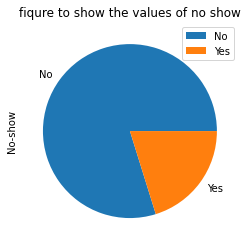

In [181]:
dataset["No-show"].value_counts().plot.pie()
plt.title('fiqure to show the values of no show')
plt.legend()

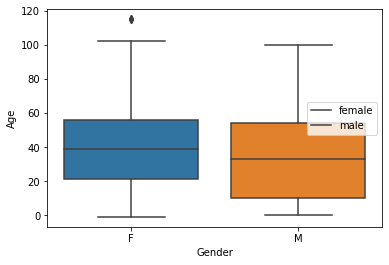

In [13]:
sns.boxplot(x = 'Gender', y = 'Age', data = dataset)
plt.legend(labels=["female","male"])
### This shows the age and gender of the observation in which the female age has an outlier of above 100

In [14]:
# notice there is age with negative from the box plot
dataset[dataset['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
# To nullify the negative 1 ,multiply the age column by -1

dataset['Age']=dataset['Age'].apply(lambda x: x*-1 if x < 0 else x)
dataset[dataset['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### COLUMN NAME REPLACEMENT AND CLEANING

In [182]:
# change the columns to lowercase for ease 
dataset.columns = dataset.columns.str.lower()
dataset.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [183]:
# column cleaning with correct spelling
dataset.rename(columns= {
    'hipertension':'hypertension',
    'handcap' : 'handicap'
}, inplace=True) 
dataset.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no-show'],
      dtype='object')

In [184]:
#patients with health condition
health_conditions = dataset.groupby(['hypertension','diabetes', 'alcoholism', 'handicap'])['no-show']
health_conditions.describe()

count unique  top   freq
hypertension diabetes alcoholism handicap                          
0            0        0          0         84115      2   No  66512
                                 1          1088      2   No    869
                                 2            97      2   No     84
                                 3             9      2   No      7
                                 4             3      2   No      2
                      1          0          1922      2   No   1506
                                 1            31      2   No     28
                                 2             1      1  Yes      1
                                 3             3      1   No      3
             1        0          0          1341      2   No   1068
                                 1            39      2   No     36
                                 2             1      1   No      1
                      1          0            75      2   No     63
                                 1             1      1  Yes      1
1            0        0          0         13663      2   No  11338
                                 1           541      2   No    449
                                 2            39      2   No     24
                                 3             1      1  Yes      1
                      1          0          1042      2   No    845
                                 1            26      2   No     25
                                 2             3      1   No      3
             1        0          0          5885      2   No   4841
                                 1           304      2   No    260
                                 2            41      2   No     34
                      1          0           243      2   No    201
                                 1            12      2   No      9
                                 2             1      1  Yes      1

In [185]:
dataset.describe(include= 'all')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


### converting the date column , ScheduledDay,AppointmentDay to datetime 

In [186]:
dataset[['scheduledday','appointmentday',]] = dataset[['scheduledday','appointmentday',]].apply(pd.to_datetime)

### converting PatientId,AppointmentID to object

In [187]:
dataset ['patientid'] = dataset['patientid'].astype(str)
dataset ['appointmentid'] = dataset['appointmentid'].astype(str)


In [188]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  object             
 1   appointmentid   110527 non-null  object             
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no-show       

In [189]:
cat_feat = list(dataset.select_dtypes(exclude = np.number).columns)
num_feat = list(dataset.select_dtypes(exclude = object).columns)

In [190]:
print(cat_feat)

['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'neighbourhood', 'no-show']


In [191]:
print(num_feat)

['scheduledday', 'appointmentday', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']


### WORKING WITH CATEGORICAL COLUMN

In [192]:
category = ['gender', 'no-show']

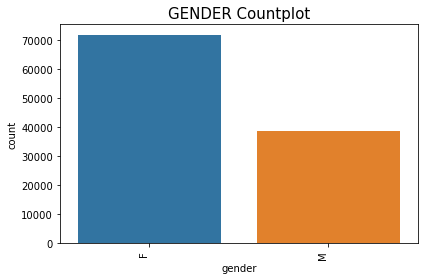

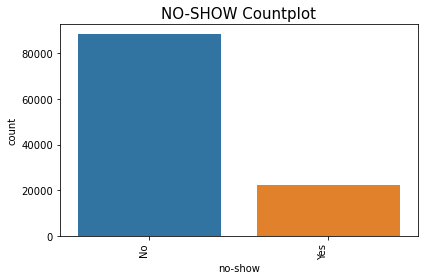

In [193]:
for col in category:
#     plt.figure(figsize=(12,5))
    g = sns.countplot(x=col, data=dataset)
    g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
    plt.title(col.upper()+' Countplot', size=15)
    plt.tight_layout()
    plt.show()

In [194]:
dataset['neighbourhood'] .value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

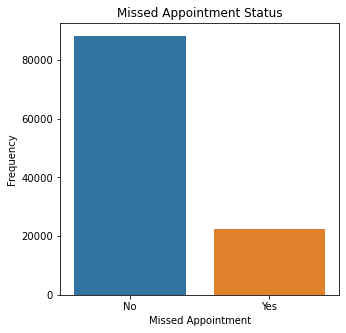

In [214]:
plt.figure(figsize=(5,5))
sns.countplot(x = "no-show", data = dataset)
plt.title("Missed Appointment Status")
plt.xlabel("Missed Appointment")
plt.ylabel("Frequency");

### this shows that more people didnt miss their appointment 

In [215]:
dataset['neighbourhood'] .value_counts().sort_values(ascending=False).head(10)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: neighbourhood, dtype: int64

#### JARDIM CAMBURI is the highest neighbourhood 

Text(0.5, 1.0, 'Increading order of the most neighbourhood')

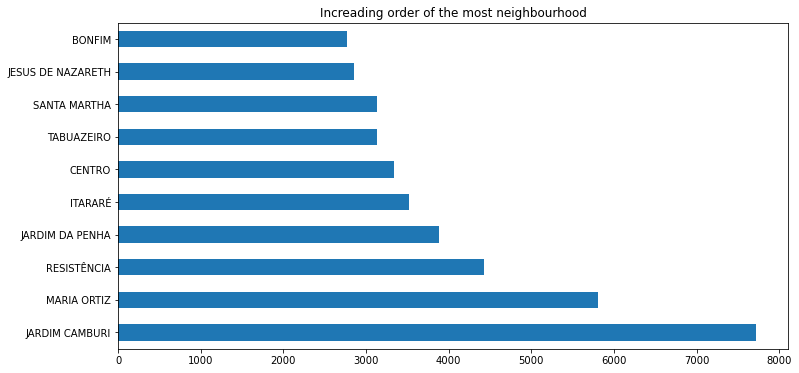

In [216]:
dataset['neighbourhood'] .value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.gcf().set_size_inches(12, 6)
plt.title('Increading order of the most neighbourhood')

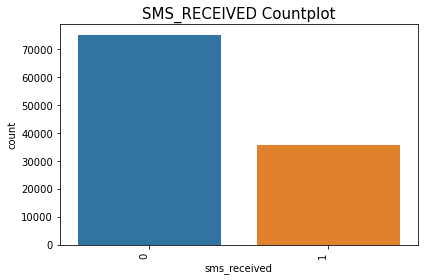

In [217]:
g = sns.countplot(x='sms_received', data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('SMS_received'.upper()+' Countplot', size=15)
plt.tight_layout()
plt.show()

### Over 70000 people did not received Sms while 3500 people received sms

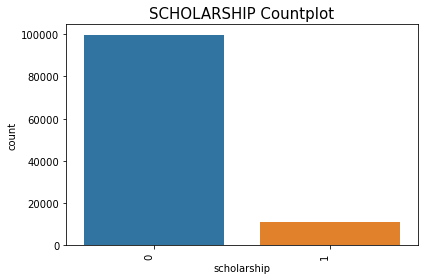

In [218]:
g = sns.countplot(x='scholarship', data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Scholarship'.upper()+' Countplot', size=15)
plt.tight_layout()
plt.show()

### 90000 people did not received Scholarship while 1500 people received scholarship


In [219]:
dataset.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no-show'],
      dtype='object')

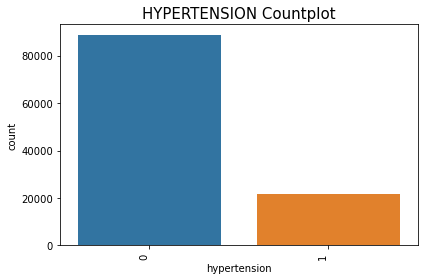

In [220]:
g = sns.countplot(x='hypertension', data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('hypertension'.upper()+' Countplot', size=15)
plt.tight_layout()
plt.show()

### 85000 people did not received Scholarship while 2500 people received scholarship


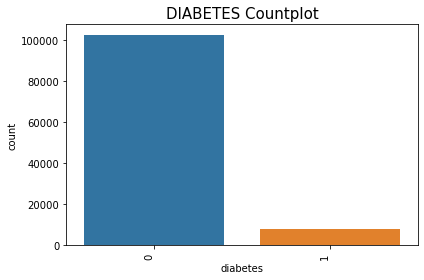

In [221]:
g = sns.countplot(x='diabetes', data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Diabetes'.upper()+' Countplot', size=15)
plt.tight_layout()
plt.show()

### 100000 people did  not have diabetes while 1500 people have diabetes


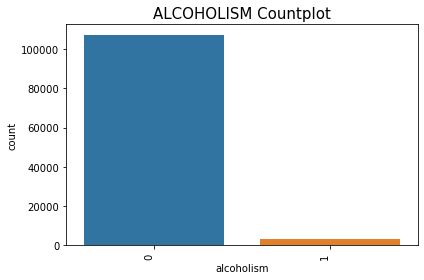

In [222]:
g = sns.countplot(x='alcoholism', data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Alcoholism'.upper()+' Countplot', size=15)
plt.tight_layout()
plt.show()

###  Over 100000 people are not alcoholic while 1000 people are alcoholic


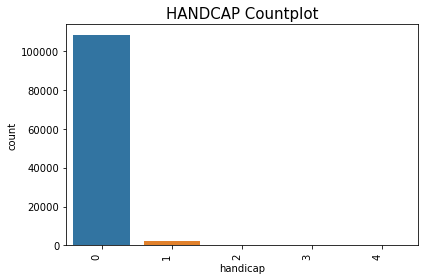

In [223]:
g = sns.countplot(x='handicap', data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Handcap'.upper()+' Countplot', size=15)
plt.tight_layout()
plt.show()

In [224]:

correlation = dataset.corr()

<AxesSubplot:>

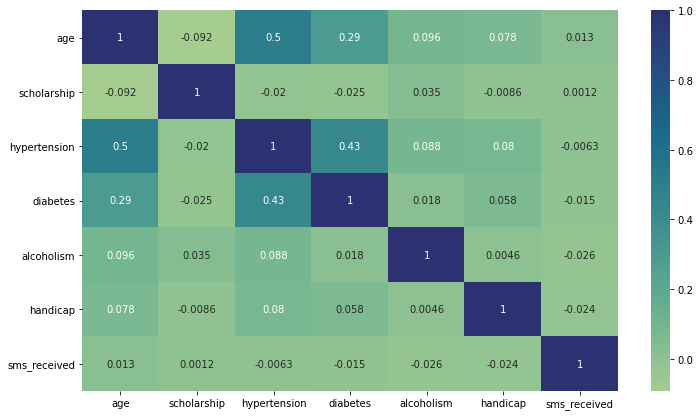

In [225]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

### This shows the correlation between features where 1 or close 1 shows the similiarities between features


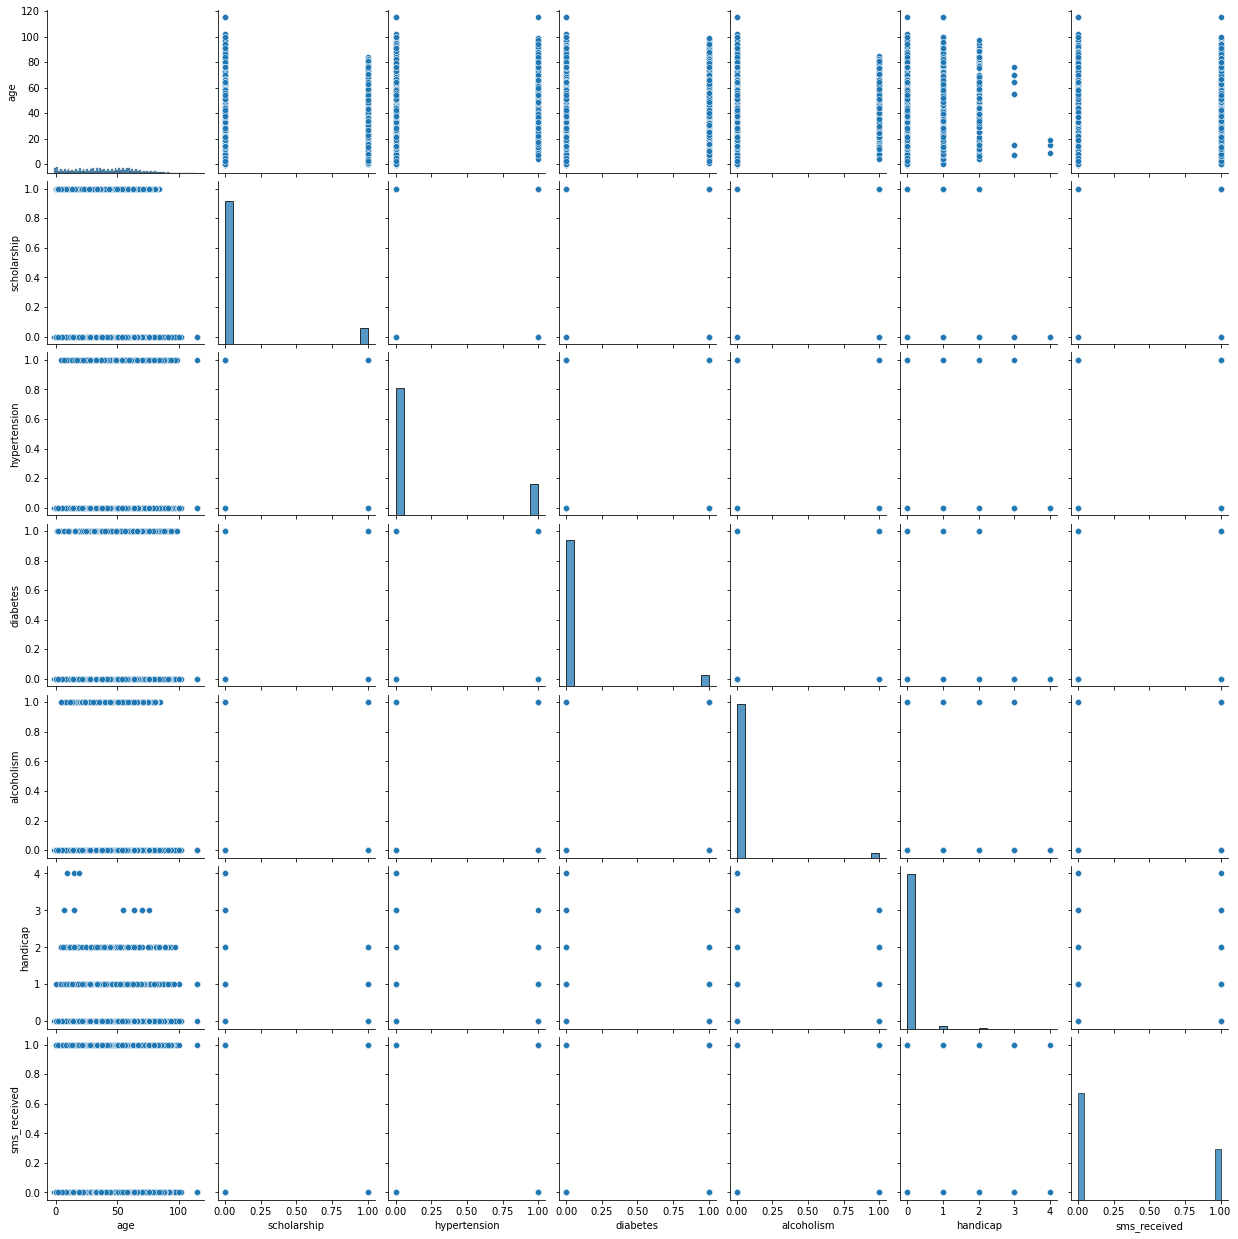

In [226]:

sns.pairplot(dataset)

In [110]:
dataset['gender'] .value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [111]:
dataset.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no-show'],
      dtype='object')

In [112]:
numeric = ['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']

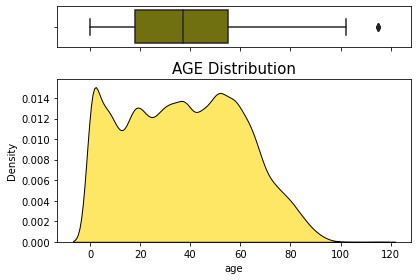

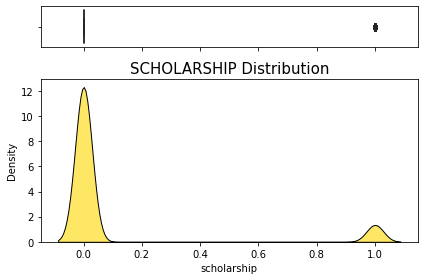

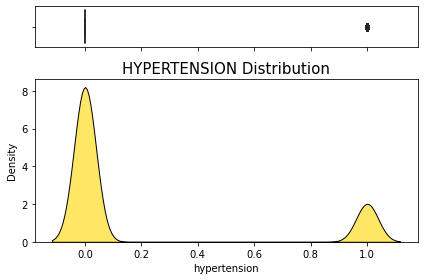

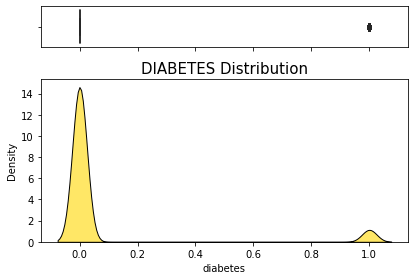

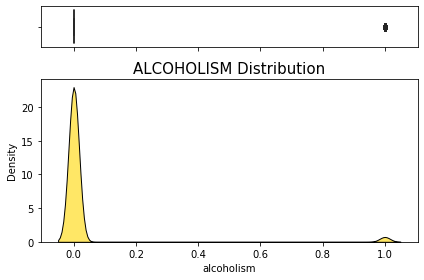

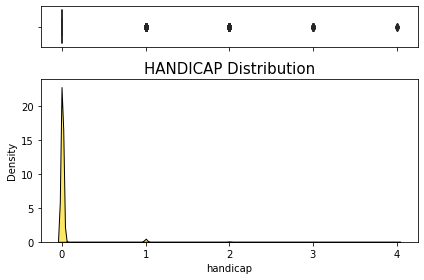

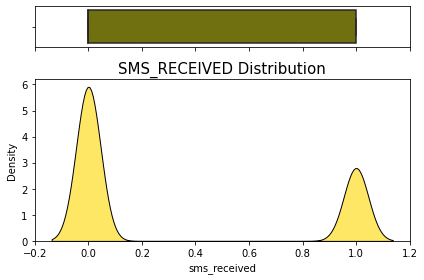

In [113]:
for col in dataset[numeric]:
    ax = [None for i in range(2)]
    # set 2 subplots and set ratio of plots 
    f, (ax[0], ax[1]) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.20, .80)
                                        })   
    g1 = sns.boxplot(col, ax=ax[0], data=dataset, color='olive') # boxplot
    g1.set(xlabel=None) # remove x axis label for boxplot
    g2 = sns.kdeplot(dataset[col], ax=ax[1], shade=True, color='gold', alpha=0.6, 
                     zorder=3, edgecolor='black') # distribution plot
    plt.title(col.upper()+' Distribution', size=15)
    plt.tight_layout()
    plt.show()

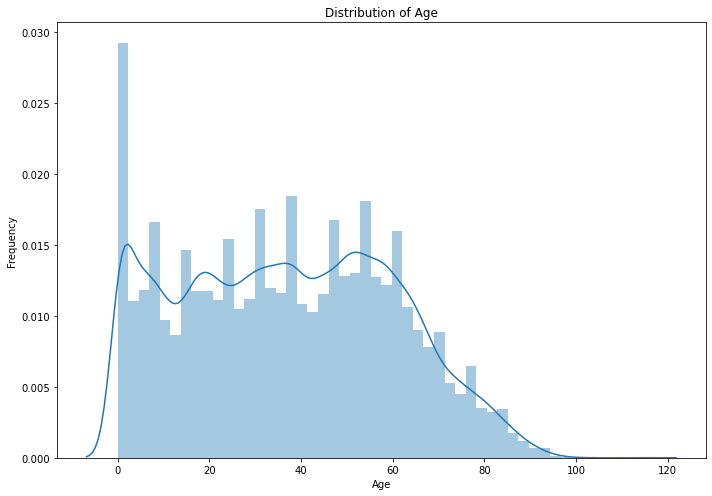

In [115]:
plt.figure(figsize=(10,7))
sns.distplot(dataset['age'])
plt.title("Distribution of Age")
plt.ylabel("Frequency")
plt.xlabel('Age')
plt.tight_layout()
plt.show()

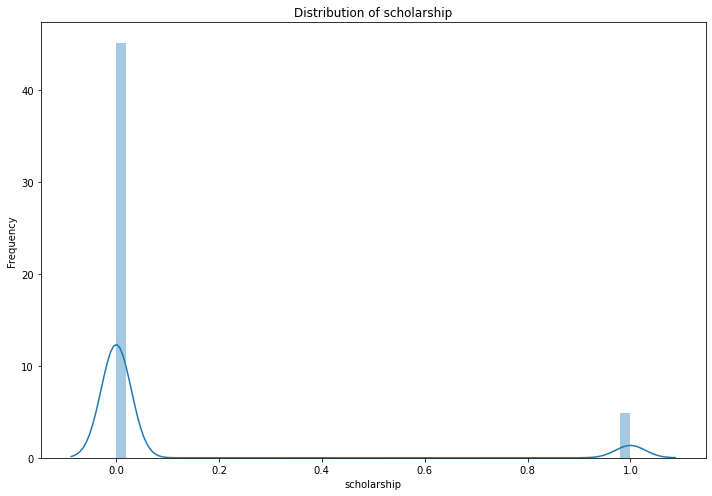

In [117]:
plt.figure(figsize=(10,7))
sns.distplot(dataset['scholarship'])
plt.title("Distribution of scholarship")
plt.ylabel("Frequency")
plt.xlabel('scholarship')
plt.tight_layout()
plt.show()

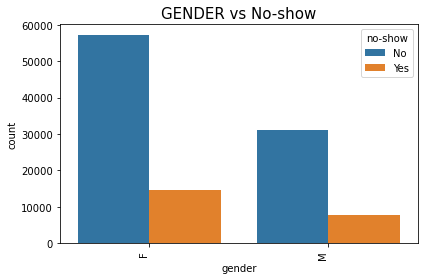

In [118]:
g = sns.countplot(x='gender', data=dataset, hue='no-show')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Gender'.upper()+' vs No-show', size=15)
plt.tight_layout()
plt.show() 

### There was more females with no show than males with no show


In [119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  object             
 1   appointmentid   110527 non-null  object             
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no-show       

### There is no missing value


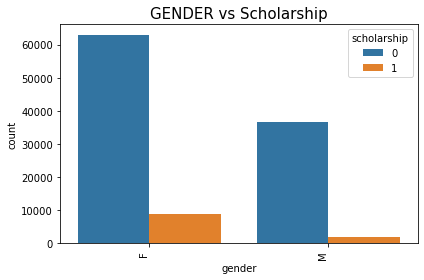

In [120]:
g = sns.countplot(x='gender', data=dataset, hue='scholarship')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Gender'.upper()+' vs Scholarship', size=15)
plt.tight_layout()
plt.show() 

### There is more females with no scholarship than male

In [122]:
dataset.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no-show'],
      dtype='object')

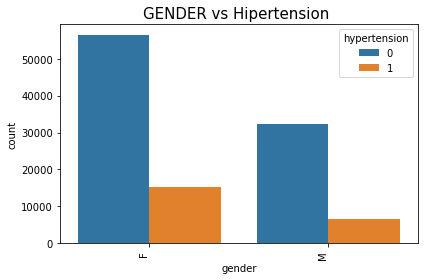

In [123]:
g = sns.countplot(x='gender', data=dataset, hue='hypertension')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Gender'.upper()+' vs Hipertension ', size=15)
plt.tight_layout()
plt.show() 

### There is more females with no hypertension than male


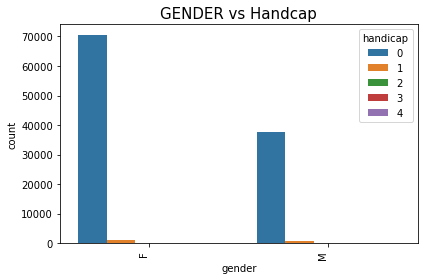

In [124]:
g = sns.countplot(x='gender', data=dataset, hue='handicap')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Gender'.upper()+' vs Handcap', size=15)
plt.tight_layout()
plt.show() 

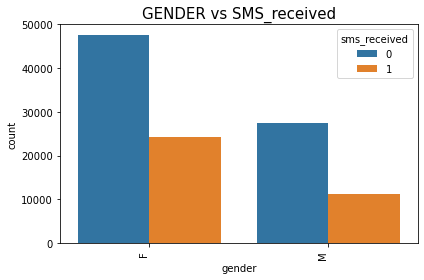

In [125]:
g = sns.countplot(x='gender', data=dataset, hue='sms_received')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Gender'.upper()+' vs SMS_received', size=15)
plt.tight_layout()
plt.show() 

In [126]:
dataset.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no-show'],
      dtype='object')

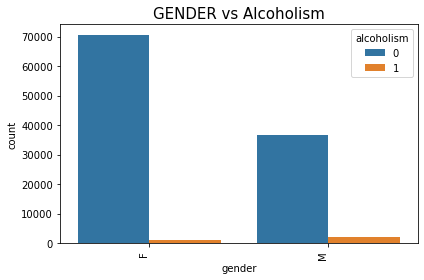

In [127]:
g = sns.countplot(x='gender', data=dataset, hue='alcoholism')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Gender'.upper()+' vs Alcoholism', size=15)
plt.tight_layout()
plt.show() 

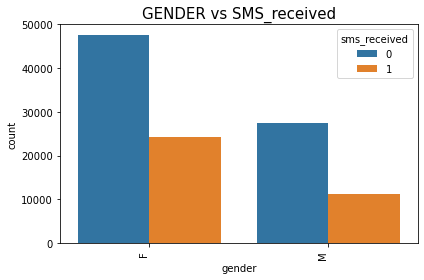

In [129]:
g = sns.countplot(x='gender', data=dataset, hue='sms_received')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Gender'.upper()+' vs SMS_received', size=15)
plt.tight_layout()
plt.show() 

In [132]:
dataset.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no-show'],
      dtype='object')

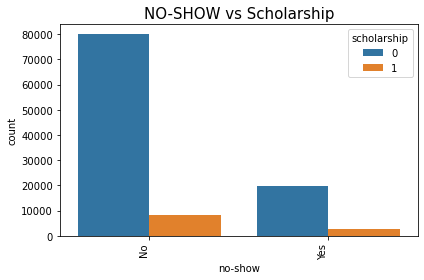

In [137]:
g = sns.countplot(x='no-show', data=dataset, hue='scholarship')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('No-show'.upper()+' vs Scholarship', size=15)
plt.tight_layout()
plt.show() 

In [138]:
dataset.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no-show'],
      dtype='object')

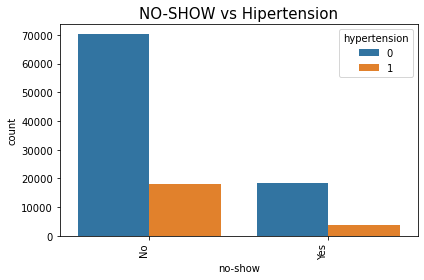

In [139]:
g = sns.countplot(x='no-show', data=dataset, hue='hypertension')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('No-show'.upper()+' vs Hipertension', size=15)
plt.tight_layout()
plt.show() 

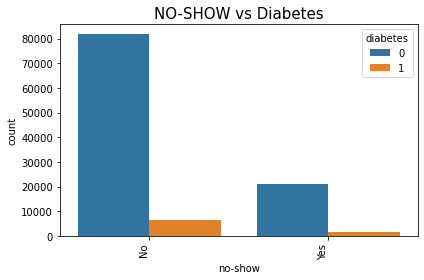

In [141]:
g = sns.countplot(x='no-show', data=dataset, hue='diabetes')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('No-show'.upper()+' vs Diabetes', size=15)
plt.tight_layout()
plt.show() 

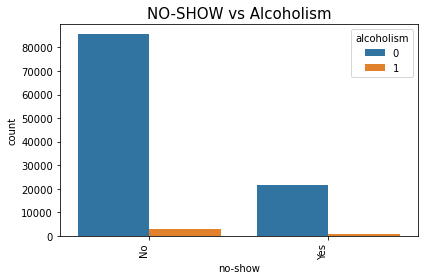

In [142]:
g = sns.countplot(x='no-show', data=dataset, hue='alcoholism')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('No-show'.upper()+' vs Alcoholism', size=15)
plt.tight_layout()
plt.show() 

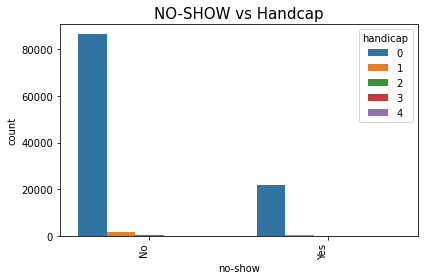

In [143]:
g = sns.countplot(x='no-show', data=dataset, hue='handicap')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('No-show'.upper()+' vs Handcap', size=15)
plt.tight_layout()
plt.show() 

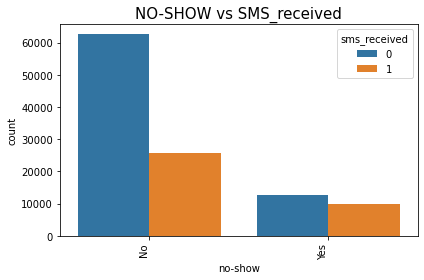

In [144]:
g = sns.countplot(x='no-show', data=dataset, hue='sms_received')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('No-show'.upper()+' vs SMS_received', size=15)
plt.tight_layout()
plt.show() 

In [145]:

['ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

['ScheduledDay',
 'AppointmentDay',
 'Age',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received']

In [146]:
dataset.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [150]:
dataset.groupby('no-show')['diabetes','scholarship'].sum()

,diabetes,scholarship
no-show,,
No,6513,8283
Yes,1430,2578


Text(0.5, 1.0, 'dataframe visualization')

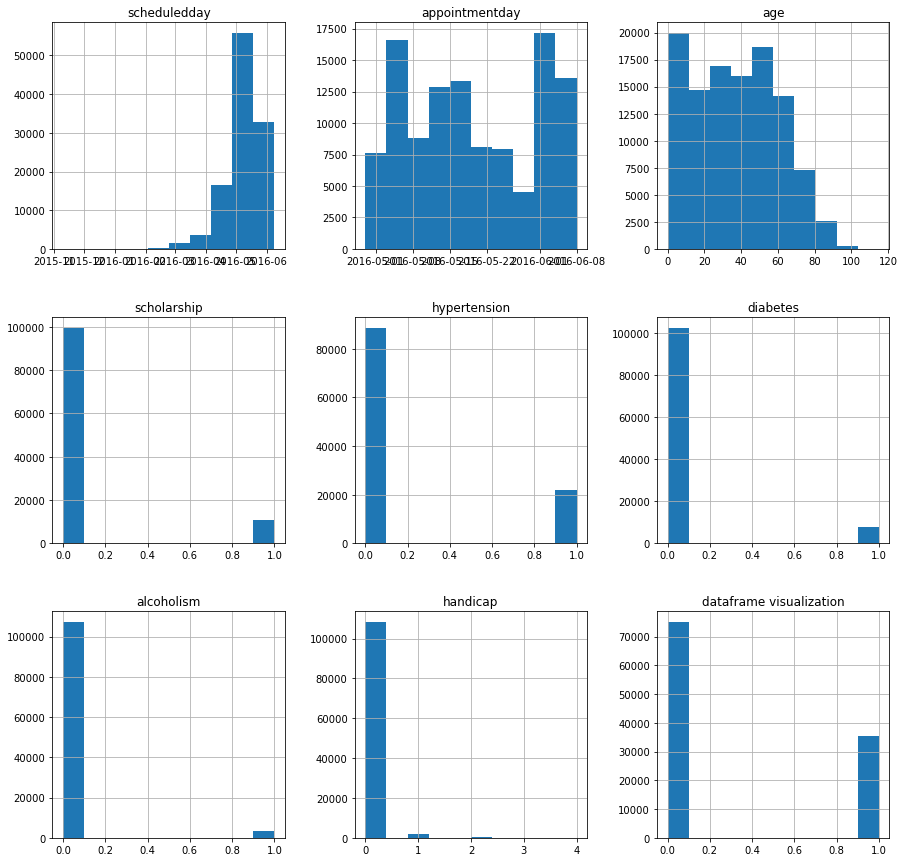

In [151]:
# hit the dataset
dataset.hist(figsize=(15,15))
plt.title('dataframe visualization')

In [152]:
dataset['diabetes'].value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

In [153]:
dataset['no-show'].value_counts()

No     88208
Yes    22319
Name: no-show, dtype: int64

In [155]:
# How many patients have scholarships? and how many of them are no-shows?
print(dataset.scholarship.value_counts())
dataset.groupby('scholarship')['no-show'].value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64


scholarship  no-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: no-show, dtype: int64

In [156]:
# How many patients have DIABETICS? and how many of them are no-shows?
print(dataset.diabetes.value_counts())
dataset.groupby('diabetes')['no-show'].value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64


diabetes  no-show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: no-show, dtype: int64

### Distribution of Age 

In [157]:
dataset.age.value_counts()

0      3539
1      2274
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

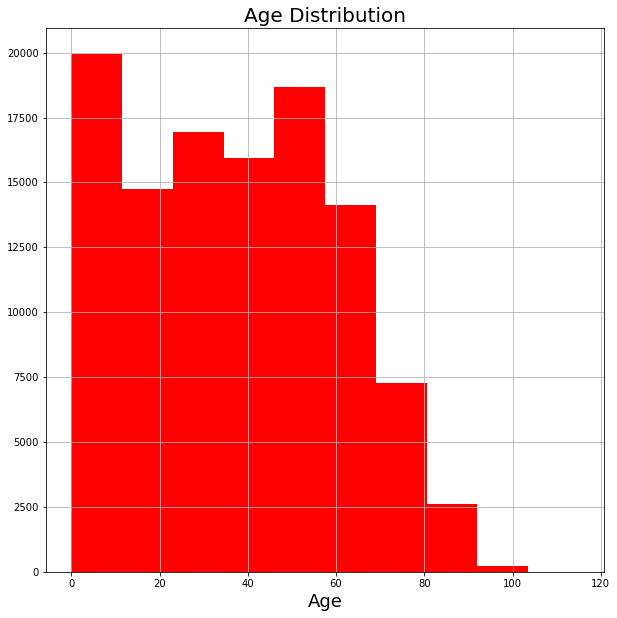

In [158]:
dataset.hist(column='age', figsize=(10,10), color='red')
plt.title("Age Distribution", fontsize=20)
plt.xlabel("Age", fontsize=18);

In [159]:
dataset.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Distribution of Age of people that miss their appointment

In [206]:
age_no_show = dataset[(dataset['age']) & (dataset['no-show'] == 'No')]

In [207]:
age_no_show

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
8,56394729949972.0,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No
15,99948393975.0,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No
24,8734857996885.0,5641780,F,2016-04-29 14:19:19+00:00,2016-04-29 00:00:00+00:00,65,TABUAZEIRO,0,0,0,0,0,0,No
26,25787851512.0,5641781,F,2016-04-29 14:19:42+00:00,2016-04-29 00:00:00+00:00,45,BENTO FERREIRA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110512,98762456447375.0,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,No
110517,5574942418928.0,5780122,F,2016-06-07 07:38:34+00:00,2016-06-07 00:00:00+00:00,19,MARIA ORTIZ,0,0,0,0,0,0,No
110521,36355337746436.0,5651072,F,2016-05-03 08:23:40+00:00,2016-06-07 00:00:00+00:00,53,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No


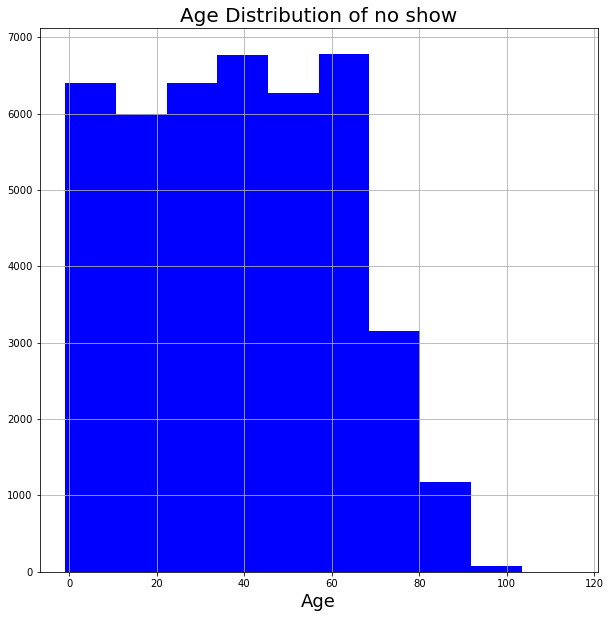

In [208]:
age_no_show.hist(column='age', figsize=(10,10), color='blue')
plt.title("Age Distribution of no show", fontsize=20)
plt.xlabel("Age", fontsize=18);

In [209]:
no_show = dataset[(dataset['no-show'] == 'No')]
no_show 

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


<AxesSubplot:>

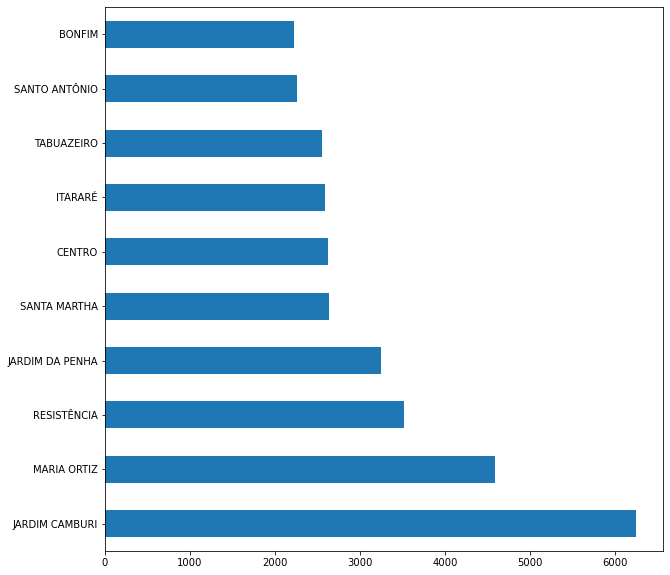

In [211]:
no_show.neighbourhood.value_counts()[:10].plot(kind='barh', figsize=(10, 10))


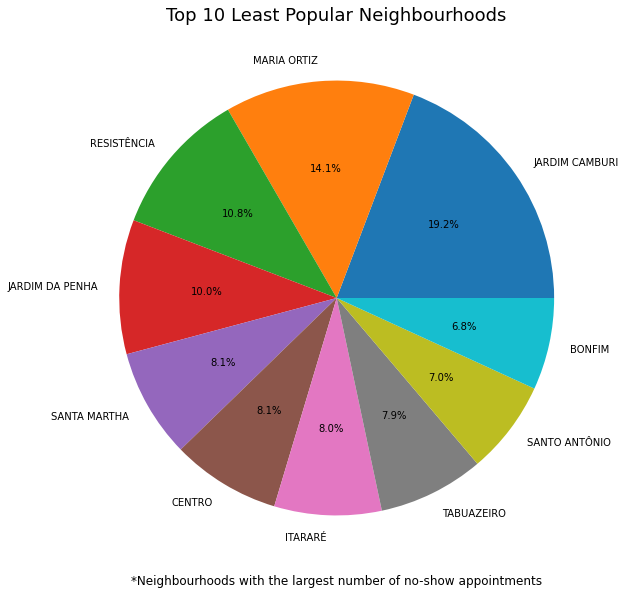

In [212]:
no_show.neighbourhood.value_counts()[:10].plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')
plt.title("Top 10 Least Popular Neighbourhoods", fontsize=18)
plt.xlabel("*Neighbourhoods with the largest number of no-show appointments", fontsize=12)
plt.ylabel("");

In [213]:
# Extract the month from the appointment date column to check for higher seasons for the no show
no_show['appointmentday	'] = pd.to_datetime(no_show['appointmentday'])
no_show['month'] = no_show['appointmentday'].dt.month
no_show['month'] = no_show['month'].apply(lambda x: calendar.month_abbr[x])
no_show.month.unique()


array(['Apr', 'May', 'Jun'], dtype=object)

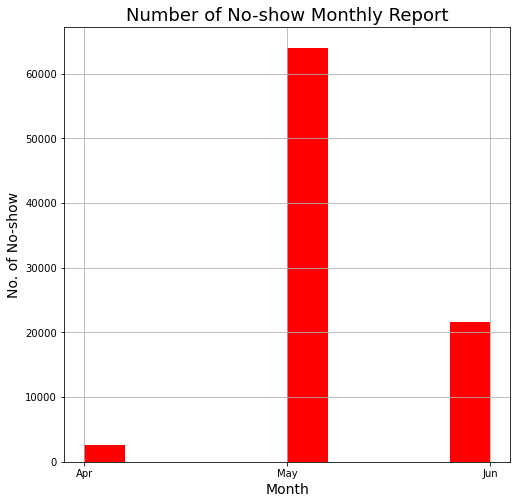

In [171]:
no_show['month'].hist(color='red', figsize=(8,8))
plt.xlabel("Month", fontsize=14)
plt.ylabel("No. of No-show", fontsize=14)
plt.title("Number of No-show Monthly Report", fontsize=18);